In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [2]:
df = pd.read_csv('output.csv')
df.shape

(1000, 2)

In [3]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
df.isna().sum()

 Review    0
Liked      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(4)

In [6]:
df = df.drop_duplicates()

In [7]:
df.columns

Index([' Review', 'Liked'], dtype='object')

In [8]:
df = df.rename(columns={' Review':'review', 'Liked':'liked'})

In [9]:
df['review'].value_counts().head()

review
Wow... Loved this place.                                                                   1
Crust is not good.                                                                         1
Not tasty and the texture was just nasty.                                                  1
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.    1
The selection on the menu was great and so were the prices.                                1
Name: count, dtype: int64

In [10]:
df['review'] = df['review'].apply(lambda x: x.lower())
df.head()

,review,liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [11]:
df['review_length'] = df ['review'].apply(len)
df.head()

,review,liked,review_length
0,wow... loved this place.,1,24
1,crust is not good.,0,18
2,not tasty and the texture was just nasty.,0,41
3,stopped by during the late may bank holiday of...,1,87
4,the selection on the menu was great and so wer...,1,59


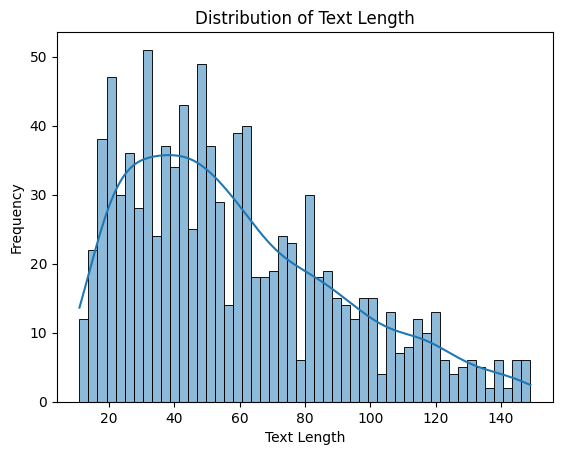

In [12]:
# Histogram of text Lengths
sns.histplot(df["review_length"], bins=50, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [13]:
def get_words(text):
    text = text.lower() # Convert to Lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text) # Remove special characters
    words = text.split()
    return words

df['tokens'] = df['review'].apply(get_words)
df.head()

,review,liked,review_length,tokens
0,wow... loved this place.,1,24,"[wow, loved, this, place]"
1,crust is not good.,0,18,"[crust, is, not, good]"
2,not tasty and the texture was just nasty.,0,41,"[not, tasty, and, the, texture, was, just, nasty]"
3,stopped by during the late may bank holiday of...,1,87,"[stopped, by, during, the, late, may, bank, ho..."
4,the selection on the menu was great and so wer...,1,59,"[the, selection, on, the, menu, was, great, an..."


In [14]:
df['tokens_length'] = df['tokens'].apply(len)
df.head()

,review,liked,review_length,tokens,tokens_length
0,wow... loved this place.,1,24,"[wow, loved, this, place]",4
1,crust is not good.,0,18,"[crust, is, not, good]",4
2,not tasty and the texture was just nasty.,0,41,"[not, tasty, and, the, texture, was, just, nasty]",8
3,stopped by during the late may bank holiday of...,1,87,"[stopped, by, during, the, late, may, bank, ho...",15
4,the selection on the menu was great and so wer...,1,59,"[the, selection, on, the, menu, was, great, an...",12


In [15]:
stop_words= set(stopwords.words('english'))
df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df.head()

,review,liked,review_length,tokens,tokens_length,tokens_no_stopwords
0,wow... loved this place.,1,24,"[wow, loved, this, place]",4,"[wow, loved, place]"
1,crust is not good.,0,18,"[crust, is, not, good]",4,"[crust, good]"
2,not tasty and the texture was just nasty.,0,41,"[not, tasty, and, the, texture, was, just, nasty]",8,"[tasty, texture, nasty]"
3,stopped by during the late may bank holiday of...,1,87,"[stopped, by, during, the, late, may, bank, ho...",15,"[stopped, late, may, bank, holiday, rick, stev..."
4,the selection on the menu was great and so wer...,1,59,"[the, selection, on, the, menu, was, great, an...",12,"[selection, menu, great, prices]"


In [16]:
lem = WordNetLemmatizer()
df['tokens_lemmatized'] = df['tokens_no_stopwords'].apply(lambda x: [lem.lemmatize(i, pos='v') for i in x])
df.head(2)

,review,liked,review_length,tokens,tokens_length,tokens_no_stopwords,tokens_lemmatized
0,wow... loved this place.,1,24,"[wow, loved, this, place]",4,"[wow, loved, place]","[wow, love, place]"
1,crust is not good.,0,18,"[crust, is, not, good]",4,"[crust, good]","[crust, good]"


In [17]:
df['tokens_cleaned'] = df['tokens_lemmatized'].apply(lambda x: ' '.join(x))
df['tokens_cleaned_length'] = df['tokens_lemmatized'].apply(len)
df.head(2)

,review,liked,review_length,tokens,tokens_length,tokens_no_stopwords,tokens_lemmatized,tokens_cleaned,tokens_cleaned_length
0,wow... loved this place.,1,24,"[wow, loved, this, place]",4,"[wow, loved, place]","[wow, love, place]",wow love place,3
1,crust is not good.,0,18,"[crust, is, not, good]",4,"[crust, good]","[crust, good]",crust good,2


In [18]:
vect = CountVectorizer(binary=True)
bag = vect.fit_transform(df['tokens_cleaned'])
print('Vocabulary:',vect.get_feature_names_out())
print("BoW matrix shape:",bag.shape)
print('BOW Matrix:\n',bag.toarray())

Vocabulary: ['absolute' 'absolutely' 'absolutley' ... 'yum' 'yummy' 'zero']
BoW matrix shape: (996, 1695)
BOW Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
tfidf = TfidfVectorizer()
tf_idf = tfidf.fit_transform(df['tokens_cleaned'])
print('Vocabulary:',tfidf.get_feature_names_out())
print("TF-IDF matrix shape:", tf_idf.shape)
print('TF-IDF Matrix:\n',tf_idf.toarray())

Vocabulary: ['absolute' 'absolutely' 'absolutley' ... 'yum' 'yummy' 'zero']
TF-IDF matrix shape: (996, 1695)
TF-IDF Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
x_bow = bag
x_tfidf = tf_idf
y = df['liked']

In [21]:
x_train_bow, x_test_bow, y_train, y_test = train_test_split(x_bow, y, test_size=0.2)

nb_bow = BernoulliNB()
nb_bow.fit(x_train_bow, y_train)

y_train_pred_bow = nb_bow.predict(x_train_bow)
y_test_pred_bow = nb_bow.predict(x_test_bow)

print("BoW Train Accuracy:", round(accuracy_score(y_train, y_train_pred_bow),3))
print("BoW Test Accuracy:", accuracy_score(y_test, y_test_pred_bow))
print(classification_report(y_train, y_train_pred_bow))
print(classification_report(y_test, y_test_pred_bow))

BoW Train Accuracy: 0.942
BoW Test Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       389
           1       0.94      0.95      0.94       407

    accuracy                           0.94       796
   macro avg       0.94      0.94      0.94       796
weighted avg       0.94      0.94      0.94       796

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       108
           1       0.65      0.78      0.71        92

    accuracy                           0.71       200
   macro avg       0.72      0.72      0.71       200
weighted avg       0.72      0.71      0.71       200



In [22]:
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2)

nb_tfidf = BernoulliNB()
nb_tfidf.fit(x_train_tfidf, y_train)

y_train_pred_tfidf = nb_tfidf.predict(x_train_tfidf)
y_test_pred_tfidf = nb_tfidf.predict(x_test_tfidf)

print("tfidf Train Accuracy:", round(accuracy_score(y_train, y_train_pred_tfidf),2))
print("tfidf Test Accuracy:", accuracy_score(y_test, y_test_pred_tfidf))
print(classification_report(y_train, y_train_pred_tfidf))
print(classification_report(y_test, y_test_pred_tfidf))

tfidf Train Accuracy: 0.94
tfidf Test Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       395
           1       0.94      0.94      0.94       401

    accuracy                           0.94       796
   macro avg       0.94      0.94      0.94       796
weighted avg       0.94      0.94      0.94       796

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.76      0.86      0.81        98

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [23]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lem.lemmatize(i, pos='v') for i in words]
    sentence = ' '.join(words)
    return sentence
    
test = ["The food was fantastic!", "Worst service ever."]
test_clean = [clean_text(i) for i in test]
print(test_clean)

# vect = CountVectorizer(binary=True)
test_bow = vect.transform(test_clean)
print(test_bow)

test_pred = nb_bow.predict(test_bow)
print(test_clean,test_pred)

['food fantastic', 'worst service ever']
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (2, 1695)>
  Coords	Values
  (0, 530)	1
  (0, 576)	1
  (1, 497)	1
  (1, 1315)	1
  (1, 1667)	1
['food fantastic', 'worst service ever'] [1 0]


In [24]:
for i,j in zip(test,test_pred):
    print(i,' -> ','Positive' if j==1 else 'Negative')

The food was fantastic!  ->  Positive
Worst service ever.  ->  Negative


In [25]:
with open('Naives_Bayes_Sentimental_Analysis.pkl', 'wb') as file:
    pickle.dump(nb_bow, file)

In [26]:
with open('Naives_Bayes_Sentimental_Analysis.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print('Model Saved successfully as Naives_Bayes_Sentimental_Analysis.pkl')

Model Saved successfully as Naives_Bayes_Sentimental_Analysis.pkl


In [27]:
pickle.dump(vect, open('vectorizer.pkl','wb'))